In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il
import os


In [2]:
def masses(df):
    keys = df.keys()
    for key in keys:
        if "Mass" in key:
            df[key] = df[key]*10**10
    return df

def color(df):
    df["SubhaloColor_g-i"] = df["SubhaloStellarPhotometrics_g"] - df["SubhaloStellarPhotometrics_i"]
    return df

In [3]:
def late_type_SFR(df):
    """
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhalosSFR"] < 0.036].index
    df_copy = df_copy.drop(index_names)
    """
    df_copy = df.copy(deep=True)
    index_names_1 = df_copy[df_copy["SubhalosSFR"] > 0.36].index
    df_copy = df_copy.drop(index_names_1)
    index_names_2 = df_copy[df_copy["SubhalosSFR"] < 0.036].index
    df_copy = df_copy.drop(index_names_2)
    
    return df_copy

def early_type_SFR(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhalosSFR"] > 0.01148].index
    df_copy = df_copy.drop(index_names)
    return df_copy

def late_type_gas(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhaloGasFraction"] < 0.1].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def early_type_gas(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhaloGasFraction"] > 0.1].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def late_type_kappa(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["Kappa_rot"] < 0.6].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def early_type_kappa(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["Kappa_rot"] > 0.6].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy


In [4]:
old = pd.read_pickle("../data/tng-100-1/cutdata/Subhalo_Centrals_minE9_5_SM.pkl")
new = pd.read_pickle("../data/tng-100-1/catalogues/kappa_rot_2502.pkl")
vel = pd.read_pickle("../data/tng-100-1/catalogues/veldisp_1803.pkl")
old.sort_values(by="id", inplace = True)
new.sort_values(by="id", inplace = True)
vel.sort_values(by="id", inplace = True)

print(len(old), len(new), len(vel))

#Masses
old = masses(old)
new = masses(new)
vel = masses(vel)

#sSFR
new["SubhalosSFR"] = 10**(9)*new["SubhaloSFR"]/new["SubhaloMassStellar"]
new["SubhaloGasFraction"] = new["SubhaloMassGas"]/new["SubhaloMassStellar"]

#old["SubhalosSFR"] = 10**(9)*old["SubhaloSFR"]/old["SubhaloMassStellar"]
old["SubhaloGasFraction"] = old["SubhaloMassInRadGas"]/old["SubhaloMassInRadStellar"]

#Adding color
new = color(new)
old = color(old)


5877 5855 5121


In [5]:
print(vel.keys())

Index(['id', 'SubhaloGalaxyRad', 'SubhaloRad', 'SubhaloMass200', 'SubhaloPosX',
       'SubhaloPosY', 'SubhaloPosZ', 'SubhaloVelX', 'SubhaloVelY',
       'SubhaloVelZ', 'SubhaloMassTotalGas', 'SubhaloMassTotalDM',
       'SubhaloMassTotalStellar', 'SubhaloMassStellar', 'SubhaloMassTotal',
       'SubhaloSFRTotal', 'SubhaloHalfmassRadStellar',
       'SubhaloHalfmassRadTotalStellar', 'SubhaloHalfmassRad_xy',
       'SubhaloHalfmassRad_xz', 'SubhaloHalfmassRad_yz',
       'SubhaloVelDispTotalStellar', 'SubhaloVelDispTotalStellar3D',
       'SubhaloVelDispTotalGas', 'SubhaloVelDispTotalGas3D',
       'SubhaloVelDispTotalDM', 'SubhaloVelDispTotalDM3D', 'SubhaloMassGas',
       'SubhaloMassDM', 'SubhaloMass', 'SubhaloSFR', 'SubhaloVelDispStellar',
       'SubhaloVelDispStellar3D', 'SubhaloVelDispGas3D', 'SubhaloVelDispDM3D'],
      dtype='object')


In [6]:
for key in vel.keys():
    if "3D" in key:
        new_key = key.replace("3D", "1D")
        vel[new_key] = vel[key]*(1/3)**(1/2)

In [7]:
#Make sure the same galaxies are selected, create late/early type catalogues
#new_earlies = early_type_SFR(early_type_gas(new))
#new_lates = late_type_SFR(late_type_gas(new))

#new_earlies = early_type_gas(new)
#new_lates = late_type_gas(new)

#new_earlies = early_type_kappa(early_type_gas(new))
#new_lates = late_type_kappa(late_type_gas(new))
vel_id = vel["id"].values
new = new[new["id"].isin(vel_id)]
old = old[old["id"].isin(vel_id)]

new_earlies = early_type_kappa(early_type_SFR(new))
new_lates = late_type_kappa(late_type_SFR(new))

new_earlies_id = new_earlies["id"].values
new_lates_id = new_lates["id"].values
new_id = new["id"].values

old_earlies = old[old["id"].isin(new_earlies_id)]
old_lates = old[old["id"].isin(new_lates_id)]
old = old[old["id"].isin(new_id)]

vel_earlies = vel[vel["id"].isin(new_earlies_id)]
vel_lates = vel[vel["id"].isin(new_lates_id)]
vel = vel[vel["id"].isin(new_id)]

print(len(new_earlies), len(new_lates), len(new)-len(new_earlies)-len(new_lates))
print(len(old_earlies), len(old_lates), len(old)-len(old_earlies)-len(old_lates))
print(len(vel_earlies), len(vel_lates), len(vel)-len(vel_earlies)-len(vel_lates))

735 208 4178
735 208 4178
735 208 4178


In [8]:
#Log format
new_log = il.formatplot.log_formater(new)
old_log = il.formatplot.log_formater(old)
new_earlies_log = il.formatplot.log_formater(new_earlies)
old_earlies_log = il.formatplot.log_formater(old_earlies)
new_lates_log = il.formatplot.log_formater(new_lates)
old_lates_log = il.formatplot.log_formater(old_lates)

vel_earlies_log = il.formatplot.log_formater(vel_earlies)
vel_lates_log = il.formatplot.log_formater(vel_lates)
vel_log = il.formatplot.log_formater(vel)

c:\Users\auror\TNG\src\illustris_python\formatplot.py:41: RuntimeWarning: divide by zero encountered in log10
  df_log[key] = np.log10(list(temp))
c:\Users\auror\TNG\src\illustris_python\formatplot.py:35: RuntimeWarning: divide by zero encountered in log10
  df_log[key] = np.log10(list(temp))
c:\Users\auror\TNG\src\illustris_python\formatplot.py:46: RuntimeWarning: divide by zero encountered in log10
  df_log[key] = np.log10(list(df[key]))


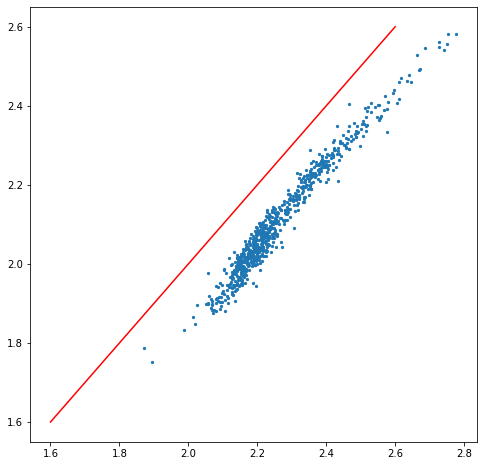

In [35]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
#y_vals = old_earlies_log["SubhaloVelDisp"].values
y_vals = vel_earlies_log["SubhaloVelDispTotalStellar"].values
x_vals = vel_earlies_log["SubhaloVelDispTotalDM"].values

axs.scatter(x_vals, y_vals, s=5)

x = np.linspace(1.6, 2.6)
axs.plot(x, x, c="red", label = "y=x")

#il.formatplot.SM_SM(ax=axs)


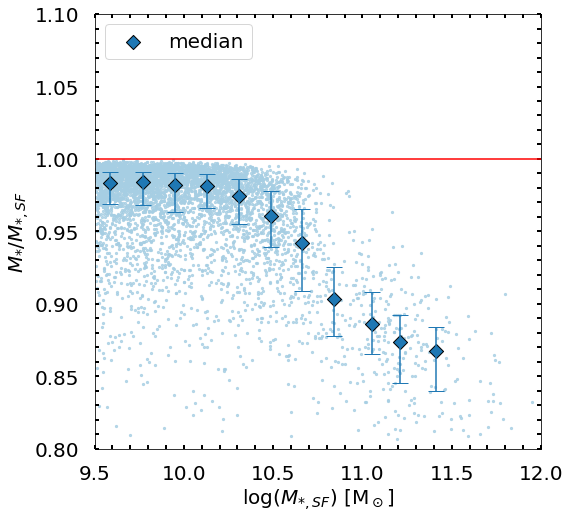

In [10]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_log["SubhaloMassStellar"].values
old_vals = old["SubhaloMassStellar"].values
new_vals = new["SubhaloMassStellar"].values

frac = new_vals/old_vals

x_med, y_med, x_err, y_err = il.stats.median_errors(old_vals_log, frac, 9.5, 11.5)

axs.scatter(old_vals_log, frac, s=5, alpha=0.8, color="#a6cee3",)
#Plot median values
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#1f78b4", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#1f78b4", edgecolors = "black", label = r"median")

x = np.linspace(0, 12, 2)
y = [1]*2
axs.plot(x, y, c="red")

il.formatplot.SM_fSM(ax=axs, y0 = 0.8, y1 = 1.1)

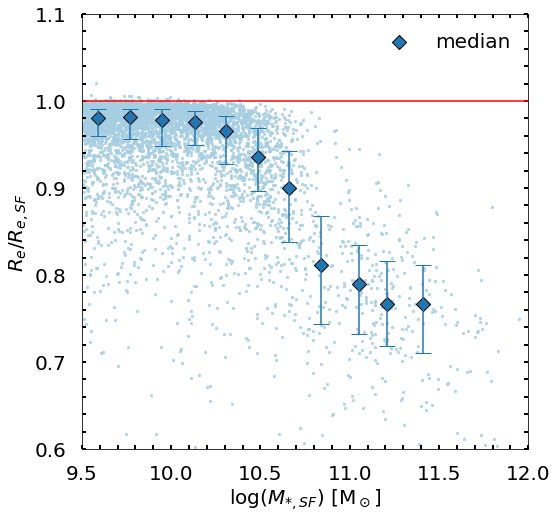

In [11]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_log["SubhaloMassStellar"].values
old_vals = np.array(old["SubhaloHalfmassRadStellar"].values)
new_vals = np.array(new["SubhaloHalfmassRadStellar"].values)
frac = new_vals/old_vals

x_med, y_med, x_err, y_err = il.stats.median_errors(old_vals_log, frac, 9.5, 11.5)

axs.scatter(old_vals_log, frac, s=5, alpha=0.8, color="#a6cee3",)
#Plot median values
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#1f78b4", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#1f78b4", edgecolors = "black", label = r"median")
x = np.linspace(0, 12, 2)
y = [1]*2
axs.plot(x, y, c="red")

il.formatplot.SM_fR(ax=axs, y0=0.6, y1=1.1)


[ 9.58877449  9.76953684  9.94855771 10.13177322 10.30934349 10.48768697
 10.65873725 10.83936396 11.05092343 11.21000553 11.41101723]


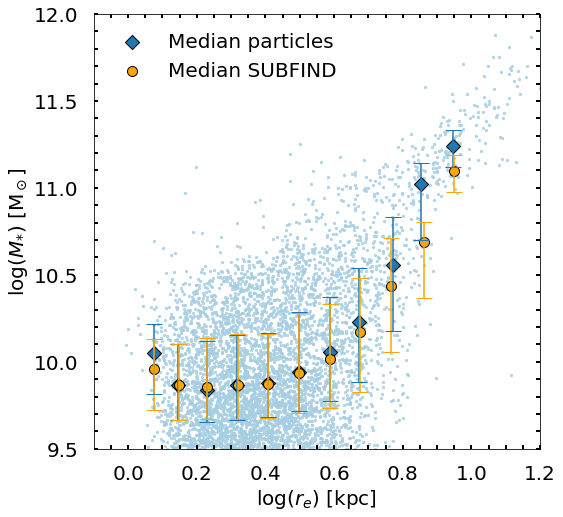

In [12]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
new_vals_y = np.array(new_log["SubhaloMassStellar"].values)
new_vals_x = np.array(new_log["SubhaloHalfmassRadStellar"].values)
old_vals_y = np.array(old_log["SubhaloMassStellar"].values)
old_vals_x = np.array(old_log["SubhaloHalfmassRadStellar"].values)

x_med_new, y_med_new, x_err_new, y_err_new = il.stats.median_errors(new_vals_x, new_vals_y, 0.0, 1)
x_med_old, y_med_old, x_err_old, y_err_old = il.stats.median_errors(old_vals_x, old_vals_y, 0.0, 1)

print(x_med)
axs.scatter(new_vals_x, new_vals_y, s=5, alpha=0.8, color="#a6cee3",)
#Plot median values
axs.errorbar(x_med_new, y_med_new, yerr=y_err_new, capsize = 8, color="#1f78b4", marker='^', fmt = 'none')
axs.scatter(x_med_new, y_med_new, marker='D', s=100, color="#1f78b4", edgecolors = "black", label = r"Median particles")
axs.errorbar(x_med_old, y_med_old, yerr=y_err_new, capsize = 8, color="orange", marker='o', fmt = 'none')
axs.scatter(x_med_old, y_med_old, marker='o', s=100, color="orange", edgecolors = "black", label = r"Median SUBFIND")

il.formatplot.R_SM(ax=axs, y0=9.5, y1=12, x0=-0.1, x1=1.2)


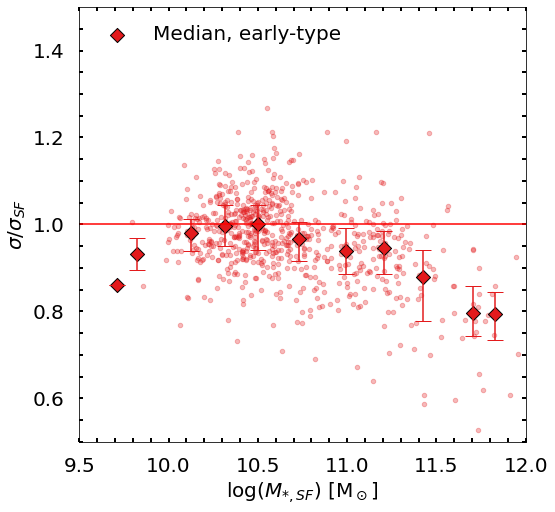

In [13]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_earlies_log["SubhaloMassStellar"].values
old_vals = np.array(old_earlies["SubhaloVelDisp"].values)
new_vals = np.array(new_earlies["SubhaloVelDisp"].values)
frac = new_vals/old_vals
axs.scatter(old_vals_log, frac, s=20, alpha=0.3, color="#e31a1c",)

#Plot median values
x_med, y_med, x_err, y_err = il.stats.median_errors(old_vals_log, frac, 9.5, 12)
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#e31a1c", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#e31a1c", edgecolors = "black", label = r"Median, early-type")

x = np.linspace(0, 12, 2)
y = [1]*2
axs.plot(x, y, c="red")

il.formatplot.SM_fVD(ax=axs, x0=9.5, x1=12, y0=0.5, y1=1.5)


C:\Users\auror\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\auror\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
slope: [[2.9144167]]
intercept: [4.52395776]
R^2: 0.9271600643638703


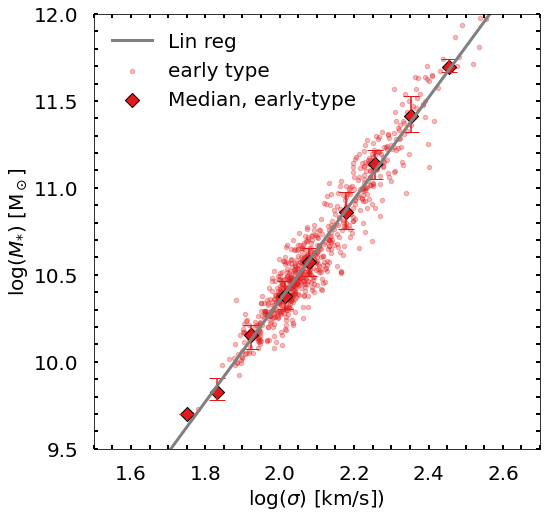

In [14]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
x_vals = new_earlies_log["SubhaloVelDisp"].values
y_vals = new_earlies_log["SubhaloMassStellar"].values
new_earlies_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar", ax = axs, color = "#e31a1c", s=20, alpha=0.3, label = "early type")

#Plot median values
x_med, y_med, x_err, y_err = il.stats.median_errors(x_vals, y_vals, 1.5, 2.5)
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#e31a1c", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#e31a1c", edgecolors = "black", label = r"Median, early-type")

#Linear regression
regX_TNG, regY_TNG = il.stats.lin_reg(x_vals, y_vals)
axs.plot(regX_TNG, regY_TNG, linewidth = 3, label ="Lin reg", color="grey")

il.formatplot.VD_SM(ax=axs, x1 = 2.7, y0=9.5)


C:\Users\auror\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\auror\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
slope: [[2.6093843]]
intercept: [5.149918]
R^2: 0.9249190363166684


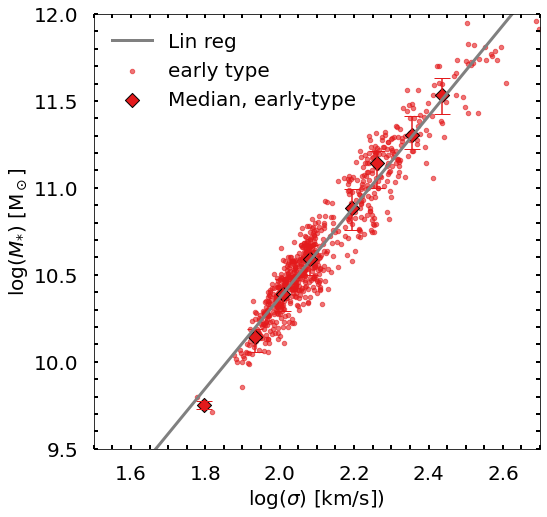

In [15]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
x_vals = old_earlies_log["SubhaloVelDisp"].values
y_vals = old_earlies_log["SubhaloMassStellar"].values
old_earlies_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar", ax = axs, color = "#e31a1c", s=20, alpha=0.6, label = "early type")

#Plot median values
x_med, y_med, x_err, y_err = il.stats.median_errors(x_vals, y_vals, 1.5, 2.5)
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#e31a1c", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#e31a1c", edgecolors = "black", label = r"Median, early-type")

#Linear regression
regX_TNG, regY_TNG = il.stats.lin_reg(x_vals, y_vals)
axs.plot(regX_TNG, regY_TNG, linewidth = 3, label ="Lin reg", color="grey")

il.formatplot.VD_SM(ax=axs, x1 = 2.7, y0=9.5)


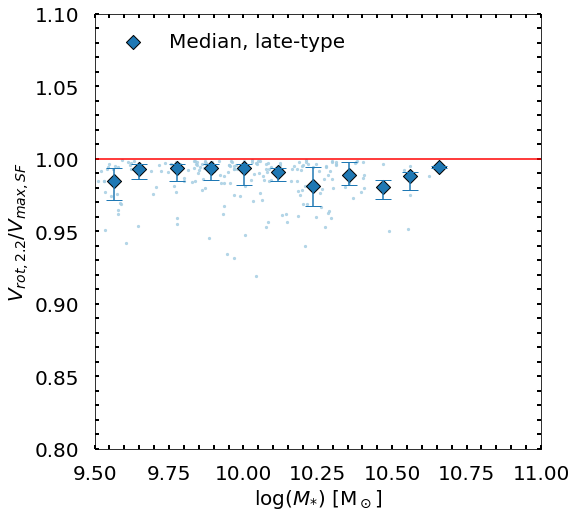

In [17]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_lates_log["SubhaloMassStellar"].values
old_vals = np.array(old_lates["SubhaloVmax"].values)
new_vals = np.array(new_lates["SubhaloRotVel_2_2Re"].values)
frac = new_vals/old_vals

x_med, y_med, x_err, y_err = il.stats.median_errors(old_vals_log, frac, 9.5, 10.75)

axs.scatter(old_vals_log, frac, s=5, alpha=0.8, color="#a6cee3",)
#Plot median values
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#1f78b4", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#1f78b4", edgecolors = "black", label = r"Median, late-type")

x = np.linspace(0, 12, 2)
y = [1]*2
axs.plot(x, y, c="red")

il.formatplot.SM_fV(ax=axs, y0=0.8, y1=1.1, x1 = 11)


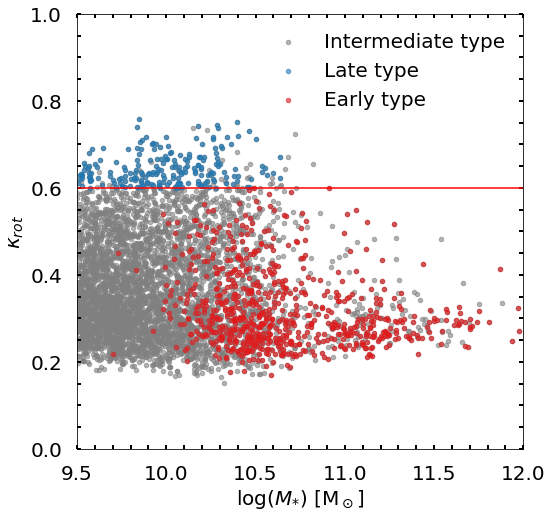

In [18]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points

new_log.plot.scatter(x="SubhaloMassStellar", y="Kappa_rot", ax = axs, color = "grey", s=20, alpha=0.6, label = "Intermediate type")
new_lates_log.plot.scatter(x="SubhaloMassStellar", y="Kappa_rot", ax = axs, color = "#1f78b4", s=20, alpha=0.6, label = "Late type")
new_earlies_log.plot.scatter(x="SubhaloMassStellar", y="Kappa_rot", ax = axs, color = "#e31a1c", s=20, alpha=0.6, label = "Early type")

x = np.linspace(9.5, 12, 2)
y = 2*[0.6]
axs.plot(x, y, c="red")

il.formatplot.SM_kappa(ax=axs, x0=9.5, x1=12, y0=0, y1 = 1)


In [19]:
vals = np.array(list(old["SubhaloLenType"].values))
star_vals = vals[:, 4]
print(star_vals.min())

4480


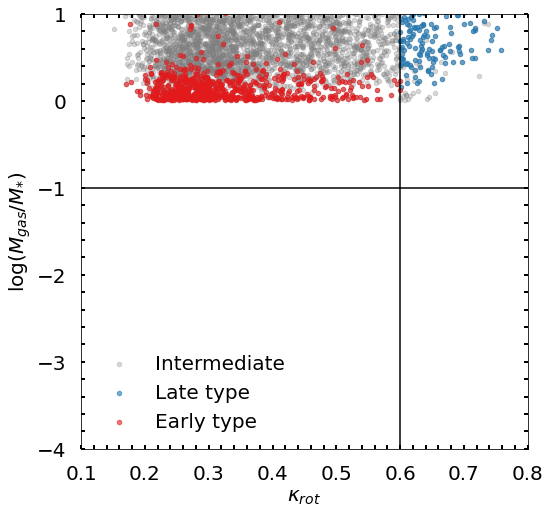

In [20]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
new_log.plot.scatter(x="Kappa_rot", y="SubhaloGasFraction", ax = axs, color = "grey", s=20, alpha=0.3, label = "Intermediate")
new_lates_log.plot.scatter(x="Kappa_rot", y="SubhaloGasFraction", ax = axs, color = "#1f78b4", s=20, alpha=0.6, label = "Late type")
new_earlies_log.plot.scatter(x="Kappa_rot", y="SubhaloGasFraction", ax = axs, color = "#e31a1c", s=20, alpha=0.6, label = "Early type")

x = np.linspace(0, 1, 2)
y = 2*[-1]
axs.plot(x, y, c="black")

x_k = 2*[0.6]
y_k = np.linspace(-6, 1, 2)
axs.plot(x_k, y_k, c="black")

il.formatplot.kappa_fG(ax=axs, y0=-4, y1=1)


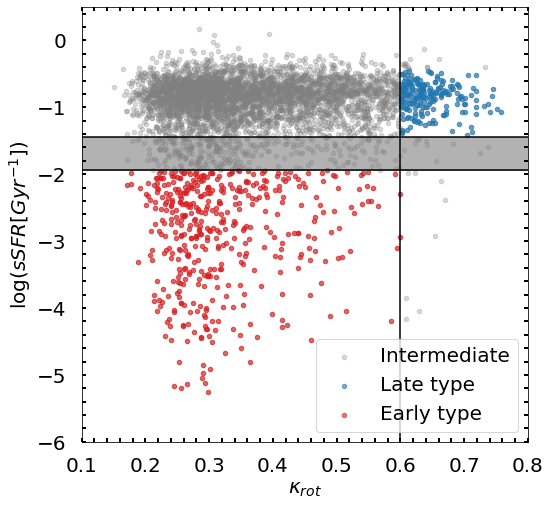

In [21]:
#old_cat["SubhaloGasFraction"] = old_cat["SubhaloMassInRadGas"]/old_cat["SubhaloMassInRadStellar"]

#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
new_log.plot.scatter(x="Kappa_rot", y="SubhalosSFR", ax = axs, color = "grey", s=20, alpha=0.3, label = "Intermediate")
new_lates_log.plot.scatter(x="Kappa_rot", y="SubhalosSFR", ax = axs, color = "#1f78b4", s=20, alpha=0.6, label = "Late type")
new_earlies_log.plot.scatter(x="Kappa_rot", y="SubhalosSFR", ax = axs, color = "#e31a1c", s=20, alpha=0.6, label = "Early type")

x_b = np.linspace(0, 1, 2)
y_b = 2*[-1.94]
axs.plot(x_b, y_b, c="black")

x_t = np.linspace(0, 1, 2)
y_t = 2*[-1.44]
axs.plot(x_t, y_t, c="black")

axs.fill_between(x_t, y_b, y_t, color="grey", alpha=0.6)

x_k = 2*[0.6]
y_k = np.linspace(-6, 1, 2)
axs.plot(x_k, y_k, c="black")

il.formatplot.kappa_sSFR(ax=axs, y0=-6, y1=0.5)


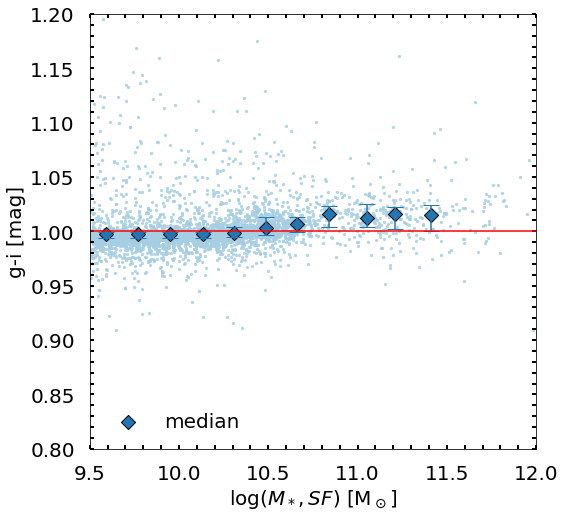

In [22]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_log["SubhaloMassStellar"].values
old_vals = np.array(old["SubhaloColor_g-i"].values)
new_vals = np.array(new["SubhaloColor_g-i"].values)
frac = new_vals/old_vals

x_med, y_med, x_err, y_err = il.stats.median_errors(old_vals_log, frac, 9.5, 11.5)

axs.scatter(old_vals_log, frac, s=5, alpha=0.8, color="#a6cee3",)
#Plot median values
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#1f78b4", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#1f78b4", edgecolors = "black", label = r"median")
x = np.linspace(9.5, 12, 2)
y = [1]*2
axs.plot(x, y, c="red")

il.formatplot.SM_fC(ax=axs, color="g-i", y0=0.8, y1=1.2)

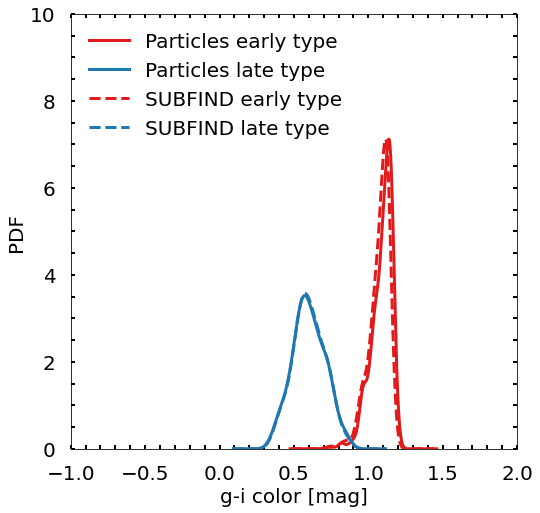

In [23]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ser1, ser2 = new_earlies["SubhaloColor_g-i"], new_lates["SubhaloColor_g-i"]
ser3, ser4 = old_earlies["SubhaloColor_g-i"], old_lates["SubhaloColor_g-i"]
ser1.plot.kde(ax=ax3, color = '#e31a1c', linewidth=3, label="Particles early type")
ser2.plot.kde(ax=ax3, color = '#1f78b4', linewidth=3, label="Particles late type")
ser3.plot.kde(ax=ax3, label="SUBFIND early type", color = '#e31a1c', linewidth=3, linestyle="--")
ser4.plot.kde(ax=ax3, label="SUBFIND late type", color = '#1f78b4', linewidth=3, linestyle="--")
il.formatplot.PDF_C('g-i', ax3, legend_on=True, y1=10)
